Exploratory Data Analysis

Now that I've have completed an initial cleaning of the data, it's time to explore what I'm dealing with.
I will take a look at the data, decide on my dependent variable, and build some heatmaps.

In [1]:
# importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#Downloading cvs files
housing = pd.read_csv('../cs2-housing/rawdata/cleaned_data.csv', index_col=0)
data_dict = pd.read_csv('../cs2-housing/documents/data_dictionary.csv')

In [12]:
housing.head()

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YrMoSold
0,1,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,548,0,61,0,0,0,0,0,208500,2008-02-01
1,2,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,460,298,0,0,0,0,0,0,181500,2007-05-01
2,3,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,608,0,42,0,0,0,0,0,223500,2008-09-01
3,4,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,642,0,35,272,0,0,0,0,140000,2006-02-01
4,5,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,836,192,84,0,0,0,0,0,250000,2008-12-01


Since all final closing prices are available, and my goal with this project is to build a model to predict final closing prices, it seems most prudent to start looking at using the column SalePrice as the dependent variable. Let's start with taking a closer look at the column.

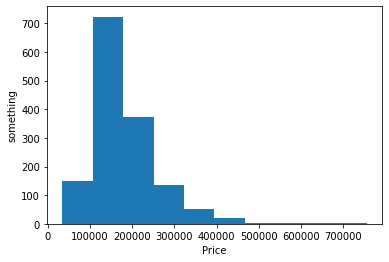

In [13]:
_ = plt.hist(housing['SalePrice'])
_ = plt.xlabel("Price")
_ = plt.ylabel("Frequency")

In [14]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Looks like the final SalePrice in Iowa ranges between 34900 and 755000. But how do the different variables correlate to each other? 

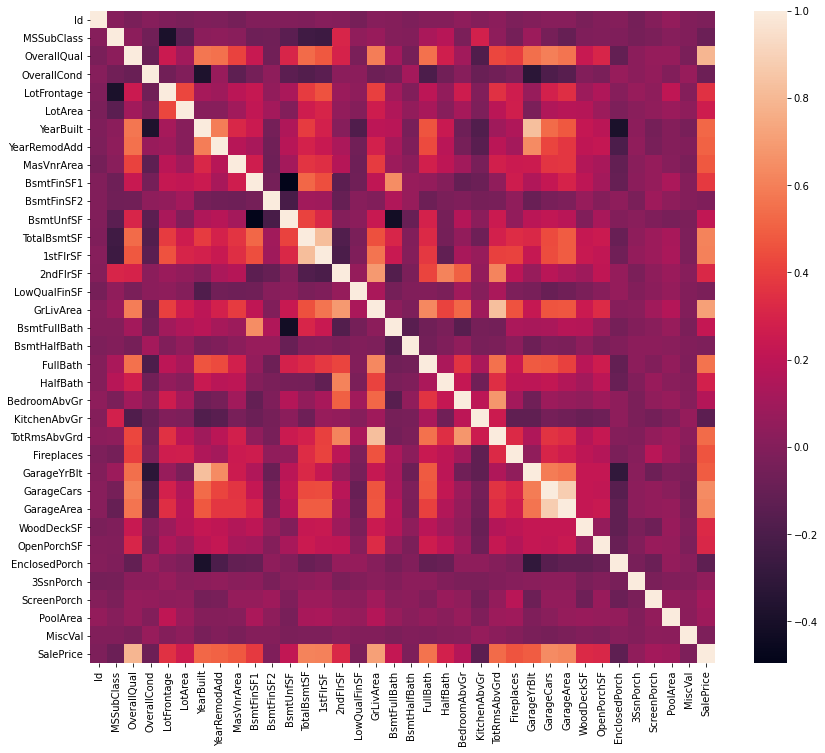

In [30]:
_ = plt.figure(figsize=(14,12))
_ = sns.heatmap(housing.corr())

Let's see how price changes based on year

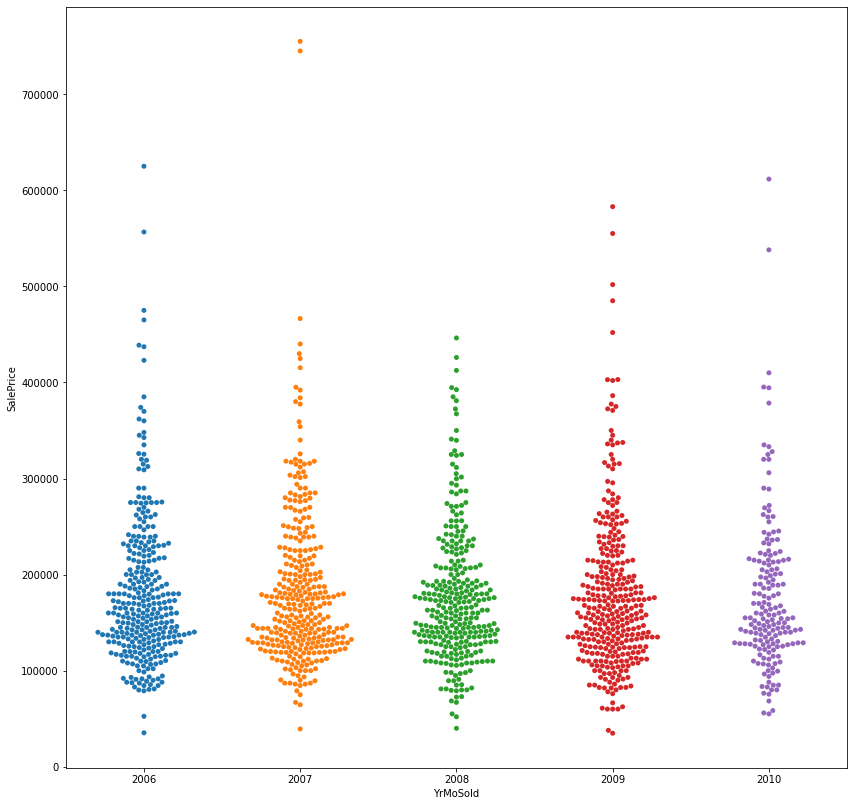

In [28]:
year_sold = pd.to_datetime(housing['YrMoSold']).dt.year
_ = plt.figure(figsize=(14,14))
_ = sns.swarmplot(x=year_sold, y='SalePrice', data=housing)